In [62]:
#record 10 audios of 1 second each and save them in the recordings folder
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write

freq = 16000
duration = 10

recording = sd.rec(int(duration * freq),
                       samplerate=freq, channels=1)
print("Start recording")
sd.wait()
print("Stop recording")
write(f"test0.wav", freq, recording)




Start recording
Stop recording


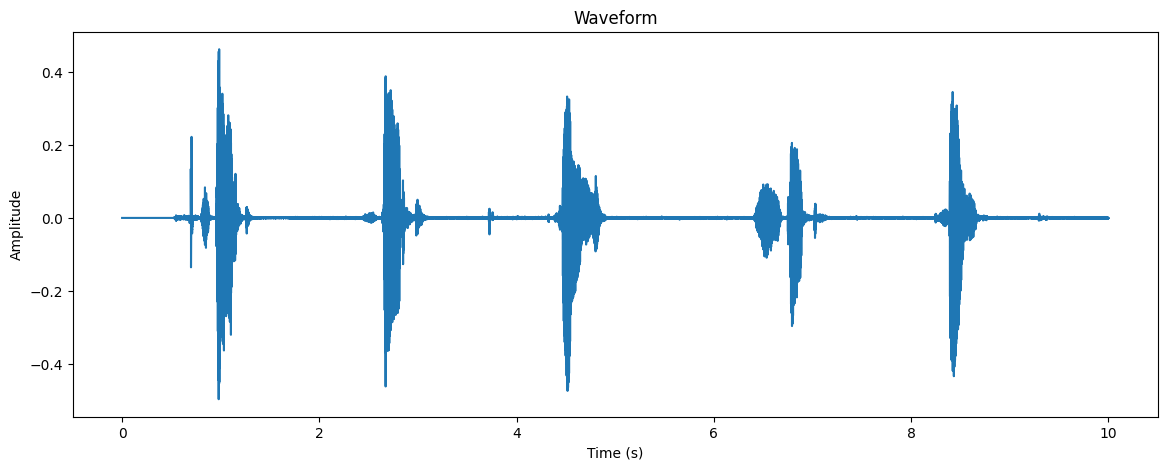

In [63]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

#read the file without using numpy
y, sr = librosa.load('test0.wav', sr=None)


# Calculate time axis
time = np.linspace(0, len(y) / sr, num=len(y))

# Plot
plt.figure(figsize=(14, 5))
plt.plot(time, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

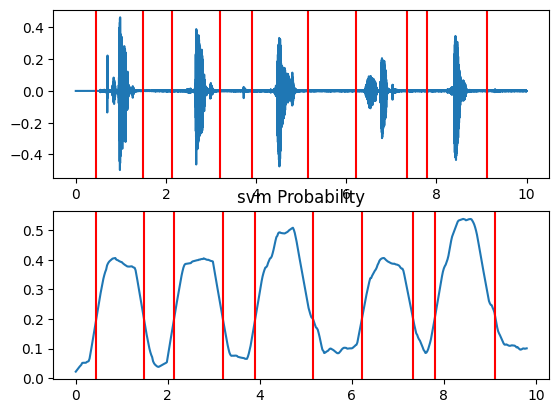

Duration 0: 1.04 sec
Duration 1: 1.06 sec
Duration 2: 1.26 sec
Duration 3: 1.12 sec
Duration 4: 1.32 sec


In [69]:
# Import required libraries
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa

# Path to audio file
path = 'test0.wav'

# Read the audio file
[Fs, x] = aIO.read_audio_file(path)

# Get non-silent segments
# arguments: signal, sampling frequency, short-term window size and step, window (in seconds) used to smooth the SVM probabilistic sequence,
# a factor between 0 and 1 that specifies how "strict" the thresholding is and finally a boolean associated to the ploting of the results
segments = aS.silence_removal(x, Fs, 0.2, 0.02, smooth_window=1, weight=0.3, plot=True)


#vezi IOM - sau da run in python 

# Convert segments from time to samples
segments_samples = [(int(start * Fs), int(end * Fs)) for start, end in segments]

# Save all non-silent segments to different files
for i, (start, end) in enumerate(segments_samples):
    segment_audio = x[start:end]
    sf.write(f"recordings/segment_{i}.wav", segment_audio, Fs)

# Print the duration of each non-silent segment
for i, (start, end) in enumerate(segments_samples):
    duration = (end - start) / Fs
    print(f"Duration {i}: {duration} sec")


In [70]:
import os
import soundfile as sf
import librosa
import numpy as np

path = 'recordings'
new_sample_rate = 16000

# Get a list of all files in the specified path
files = [os.path.join(path, name) for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]

for file in files:
    # Load the audio file
    y, sr = librosa.load(file, sr=None)
    
    # Check if the recording is less or equal to 0.5 seconds, if so, remove it
    if len(y) / sr <= 0.5:
        os.remove(file)
        continue  # Skip the rest of the loop for this file
    
    # Resample the audio to 16000 Hz
    y_resampled = librosa.resample(y, orig_sr=sr, target_sr=16000)
    
    # Trim the audio to exactly one second if its duration is greater than 1 second
    if len(y_resampled) > new_sample_rate:
        start_index = len(y_resampled) - new_sample_rate
        y_one_second = y_resampled[start_index:]
    else:
        # Pad the audio with zeros if its duration is less than 1 second
        num_zeros = new_sample_rate - len(y_resampled)
        y_one_second = np.concatenate((y_resampled, np.zeros(num_zeros)))

    y_normalized = y_one_second / np.max(np.abs(y_one_second))

    # Save the resampled and trimmed audio (overwrite the existing files)
    sf.write(file, y_normalized, new_sample_rate)

In [71]:
import os
import librosa

path = 'recordings'

# Get a list of all files in the folder
files = [os.path.join(path, name) for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]

# Initialize variables to store the duration and sample rate of the first file
first_duration = None
first_sr = None

# Iterate through each file
for file in files:
    # Load the audio file and get its duration and sample rate
    y, sr = librosa.load(file, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    
    # If this is the first file, store its duration and sample rate
    if first_duration is None:
        first_duration = duration
        first_sr = sr
    else:
        # Compare the duration and sample rate of this file with the first file
        if duration != first_duration or sr != first_sr:
            print(f"File {file} has different duration or sample rate.")
            print(f"Expected duration: {first_duration}, Sample rate: {first_sr}")
            print(f"Actual duration: {duration}, Sample rate: {sr}")
